# Desafio Ifood | Módulo de Estatítica Descritiva
### Estatística do Básico ao Avançado (EBA)

**Descrição dos dados:**

O conjunto de dados é composto por clientes da empresa Ifood com dados sobre:

    Perfis de clientes
    Preferências do produto
    Sucessos/fracassos da campanha
    Desempenho do canal

**Objetivo:**

O objetivo nesse módulo é fazer uma análise exploratória dos dados fornecidos.

## **Importando as bibliotecas**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis
from scipy.stats.mstats import variation

## **Importando o DataFrame**

In [16]:
df = pd.read_csv("mkt_data.csv")
df.drop("Unnamed: 0", axis = 1, inplace = True)
df.reset_index(inplace=True)
df

,index,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_status,education_level,kids,expenses
0,0,58138.0,0,0,58,635,88,546,172,88,...,3.0,NaN,NaN,1529,1441,0,Single,Graduation,0,1529
1,1,46344.0,1,1,38,11,1,6,2,1,...,3.0,NaN,NaN,21,15,0,Single,Graduation,2,21
2,2,71613.0,0,0,26,426,49,127,111,21,...,3.0,NaN,NaN,734,692,0,Together,Graduation,0,734
3,3,26646.0,1,0,26,11,4,20,10,3,...,3.0,NaN,NaN,48,43,0,Together,Graduation,1,48
4,4,58293.0,1,0,94,173,43,118,46,27,...,NaN,NaN,5.0,407,392,0,Married,PhD,1,407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,3.0,NaN,NaN,1094,847,0,Married,Graduation,1,1094
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,NaN,NaN,5.0,436,428,1,Together,PhD,3,436
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,3.0,NaN,NaN,1217,1193,1,Divorced,Graduation,0,1217
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,NaN,4.0,NaN,782,721,0,Together,Master,1,782


## **Análise Exploratória dos Dados:**
- Quantos dados temos? *```Linhas e colunas```*
- Quais são as colunas numéricas?
- Temos duplicados na nossa base? *```Se tivermos, retire-os```*
- Temos dados nulos nessa base? Será que eles indicam algo? *```O que fazer com eles?```*
- Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?



#### Quantos dados temos?

In [17]:
# Quantidade de linhas e colunas
df.shape

(2205, 44)

#### Quais são as colunas numéricas?
Podemos dividir os tipos das colunas em númericas e categóricas. As colunas categóricas são aquelas formadas por object (...). Já as numéricas, que é a que queremos, é formada por 'float64', 'int64', 'float32', 'int32', 'float16', 'int16'

In [18]:
# Visualizando as colunas e seus respectivos tipos:
pd.DataFrame(df.dtypes)

,0
index,int64
Income,float64
Kidhome,int64
Teenhome,int64
Recency,int64
MntWines,int64
MntFruits,int64
MntMeatProducts,int64
MntFishProducts,int64
MntSweetProducts,int64


In [19]:
# Filtrando o DataFrame apenas com as colunas de valor numérico:

numerics = ['float64', 'int64', 'float32', 'int32', 'float16', 'int16']
df_numerics = df.select_dtypes(include = numerics).columns
df_numerics

Index(['index', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'kids', 'expenses'],
      dtype='object')

#### Há duplicados na base?

In [23]:
# Verificando a existência de duplicados:

df.duplicated().sum()

0

Como não temos dados duplicados, não precisamos modificar a base

#### Temos dados nulos nessa base? Será que eles indicam algo? O que fazer com eles?

In [24]:
# Verificando, percentualmente, a existência de nulos na base:

pd.DataFrame(df.isnull().sum()/df.shape[0])

,0
index,0.000000
Income,0.000000
Kidhome,0.000000
Teenhome,0.000000
Recency,0.000000
MntWines,0.000000
MntFruits,0.000000
MntMeatProducts,0.000000
MntFishProducts,0.000000
MntSweetProducts,0.000000


Ao identificarmos colunas com mais de 90% de dados nulos em um DataFrame, é comum considerarmos duas soluções:
* Excluir as colunas com nulos ou com mais de 50% de nulos, por exemplo
* Substituir esses valores pela moda ou média dos dados

No entanto, essas ações podem ter impactos desconhecidos no resultado final da análise. Para tomar uma decisão mais assertiva, é fundamental analisar o comportamento dessas colunas dentro do próprio DataFrame e, a partir dessas observações, pensar em uma solução adequada.

In [32]:
# Visualizando o comportamento dos dados

print(f'Marital Divorced: {df.marital_Divorced.value_counts()}\n')
print(f'Marital Married: {df.marital_Married.value_counts()}\n')
print(f'Marital Single: {df.marital_Single.value_counts()}\n')
print(f'Marital Together: {df.marital_Together.value_counts()}\n')  
print(f'Marital Widow: {df.marital_Widow.value_counts()}\n')
print(f"Education 2n Cycle: {df['education_2n Cycle'].value_counts()}\n")
print(f'Education Basic: {df.education_Basic.value_counts()}\n')
print(f'Education Graduatin: {df.education_Graduation.value_counts()}\n')
print(f'Education Master: {df.education_Master.value_counts()}\n')
print(f'Education PhD: {df.education_PhD.value_counts()}')

Marital Divorced: 1.0    230
Name: marital_Divorced, dtype: int64

Marital Married: 5.0    854
Name: marital_Married, dtype: int64

Marital Single: 4.0    477
Name: marital_Single, dtype: int64

Marital Together: 3.0    568
Name: marital_Together, dtype: int64

Marital Widow: 2.0    76
Name: marital_Widow, dtype: int64

Education 2n Cycle: 1.0    198
Name: education_2n Cycle, dtype: int64

Education Basic: 2.0    54
Name: education_Basic, dtype: int64

Education Graduatin: 3.0    1113
Name: education_Graduation, dtype: int64

Education Master: 4.0    364
Name: education_Master, dtype: int64

Education PhD: 5.0    476
Name: education_PhD, dtype: int64


Durante a análise dos dados do DataFrame, foi observado que as colunas relacionadas ao grau de escolaridade e ao tipo de relacionamento apresentavam dois valores: nulos e um outro valor próprio, que poderiam ser interpretados como um "booleano" indicando a presença ou ausência de um determinado grau de escolaridade ou tipo de relacionamento. Para tratar esses valores nulo, pode-se adicionar novas colunas ao DataFrame, que referenciam as colunas em questão, e preenchê-las com 1 e 0, em que 1 indica a presença do valor e 0 indica a ausência do valor. Essa estratégia visa melhorar a precisão e completude das análises futuras e simplificar a manipulação desses dados.

In [44]:
# Define as colunas nulas
columns_null = df.columns[df.isnull().any()].to_list()

# Criando um novo DataFrame apenas com valores booleanos
for col in columns_null:
  df_bool = pd.DataFrame(np.where(df[f'{col}'].notnull(), 1, 0), columns=[col])
  df_bool = df_bool.add_prefix('has_')
  df = pd.concat([df, df_bool], axis=1)
  
df

,index,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,has_marital_Divorced,has_marital_Married,has_marital_Single,has_marital_Together,has_marital_Widow,has_education_2n Cycle,has_education_Basic,has_education_Graduation,has_education_Master,has_education_PhD
0,0,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,0,0,0,0,1,0,0
1,1,46344.0,1,1,38,11,1,6,2,1,...,0,0,1,0,0,0,0,1,0,0
2,2,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,1,0,0,0,1,0,0
3,3,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,1,0,0,0,1,0,0
4,4,58293.0,1,0,94,173,43,118,46,27,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,2200,61223.0,0,1,46,709,43,182,42,118,...,0,1,0,0,0,0,0,1,0,0
2201,2201,64014.0,2,1,56,406,0,30,0,0,...,0,0,0,1,0,0,0,0,0,1
2202,2202,56981.0,0,0,91,908,48,217,32,12,...,1,0,0,0,0,0,0,1,0,0
2203,2203,69245.0,0,1,8,428,30,214,80,30,...,0,0,0,1,0,0,0,0,1,0


Após as modificações desejadas, as novas colunas foram adicionadas ao DataFrame, contendo os valores anteriormente ditos. Essas colunas podem fornecer informações adicionais ou insights importantes para a análise dos dados.

#### **Qual é a média, mediana, 25 percentil, 75 percentil, mínimo e máximo de cada uma das colunas numéricas?**

Devemos lembrar que, anteriormente, havíamos separado um DataFrame entitulado de "df_numerics" apenas com as colunas numéricas. Dessa forma, utilizaremos essa informação para calcular os dados solicitados:

In [11]:
df[df_numerics].describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall,kids,expenses
count,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000,...,183.0,49.0,1015.0,335.0,439.0,2021.000000,2021.000000,2021.000000,2021.000000,2021.000000
mean,51687.258783,0.443345,0.509649,48.880752,306.492331,26.364671,166.059871,37.603662,27.268679,43.921821,...,1.0,2.0,3.0,4.0,5.0,563.789213,519.867392,0.302326,0.952994,563.789213
std,20713.046401,0.536196,0.546393,28.950917,337.603877,39.776518,219.869126,54.892196,41.575454,51.678211,...,0.0,0.0,0.0,0.0,0.0,576.775749,554.797857,0.680812,0.746123,576.775749
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,2.0,3.0,4.0,5.0,4.000000,-283.000000,0.000000,0.000000,4.000000
25%,35416.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,1.0,2.0,3.0,4.0,5.0,55.000000,42.000000,0.000000,0.000000,55.000000
50%,51412.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,1.0,2.0,3.0,4.0,5.0,343.000000,288.000000,0.000000,1.000000,343.000000
75%,68274.000000,1.000000,1.000000,74.000000,507.000000,33.000000,230.000000,50.000000,34.000000,56.000000,...,1.0,2.0,3.0,4.0,5.0,964.000000,883.000000,0.000000,1.000000,964.000000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.0,2.0,3.0,4.0,5.0,2491.000000,2458.000000,4.000000,3.000000,2491.000000


## **Perfil de Clientes:**

- Qual é o maior salário encontrado na nossa base? *```Veja na coluna Income```*
- Qual é a distribuição de salário na nossa base? Temos clientes que ganham
muito bem e outros que não ganham muito bem? *```Veja na coluna Income```*
- Nossos clientes tem níveis de educação maiores ou menores? *```Veja na coluna
education_level```*
- Quantos clientes temos em cada estado civil? *```Veja na coluna marital_status```*

#### Qual é o maior salário encontrado na nossa base?

In [12]:
# Cálculo do maior salário

df.Income.max()

113734.0

#### Qual é a distribuição de salário na nossa base? Temos clientes que ganham muito bem e outros que não ganham muito bem?

Analisaremos a pergunta acima utilizando algumas medidas de tendência central e de dispersão

1. Medidas de tendência central:

In [13]:
# Verificação da moda, média, mediana, quartis e percentis

df.Income.describe()

count      2021.000000
mean      51687.258783
std       20713.046401
min        1730.000000
25%       35416.000000
50%       51412.000000
75%       68274.000000
max      113734.000000
Name: Income, dtype: float64

<AxesSubplot:ylabel='Income'>

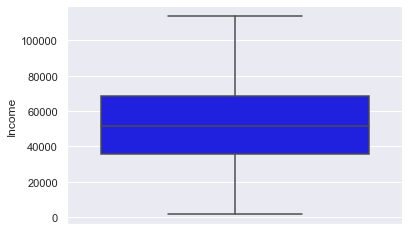

In [14]:
# Análise do boxplot

sns.set_theme(style="darkgrid")
sns.boxplot(data= df, y="Income", color="blue")

<AxesSubplot:xlabel='Income', ylabel='Count'>

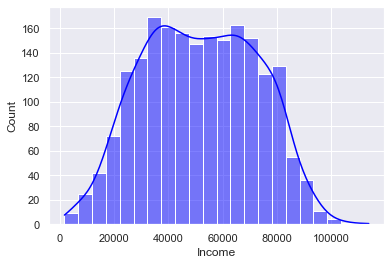

In [15]:
# Análise do histograma

sns.set_theme(style="darkgrid")
sns.histplot(data=df, x="Income", kde=True, color="blue")

2. Medidas de dispersão:

In [16]:
# Verificação da amplitude

amplitude = df.Income.max() - df.Income.min()
print(f"Valor da amplitude: {amplitude}")

Valor da amplitude: 112004.0


In [17]:
# Verificação do coeficiente de variação

coef_variacao = variation(df.Income)*100
print(f"Valor do coeficiente de variação: {coef_variacao}")

Valor do coeficiente de variação: 40.063879957330926


In [18]:
# Skew

valor_skew = skew(df.Income)
print(f"Valor do Skew: {valor_skew}")

Valor do Skew: 0.004353806218472682


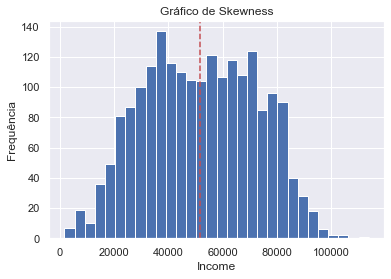

In [28]:
# Gráfico de skew

# Calcula a skewness dos dados
valor_skew = skew(df.Income)

# Plota um histograma dos dados
plt.hist(df.Income, bins=30)

# Adiciona uma linha vertical indicando a posição da skewness
plt.axvline(x=np.mean(df.Income) + valor_skew * np.std(df.Income), color='r', linestyle='--')

# Configura o título e os rótulos dos eixos
plt.title('Gráfico de Skewness')
plt.xlabel('Income')
plt.ylabel('Frequência')

# Mostra o gráfico
plt.show()

In [23]:
#Kurtosis

valor_kurtosis = kurtosis(df.Income)
print(f"Valor da Kustosis: {valor_kurtosis}")

Valor da Kustosis: -0.8244973810504694


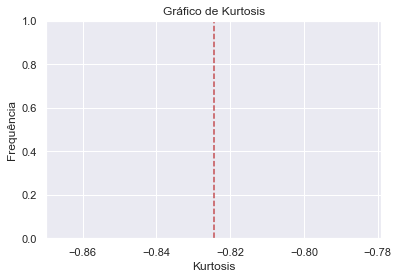

In [26]:
# Gráfico kurtosis
# Cálculo da kurtosis
valor_kurtosis = kurtosis(df.Income)

# Plota um gráfico com o valor da kurtosis
plt.axvline(x=valor_kurtosis, color='r', linestyle='--')

# Configura o título e os rótulos dos eixos
plt.title('Gráfico de Kurtosis')
plt.xlabel('Kurtosis')
plt.ylabel('Frequência')

# Mostra o gráfico
plt.show()



#### Nossos clientes tem níveis de educação maiores ou menores?

In [34]:
df_education = pd.DataFrame({
  'Count' : df.education_level.value_counts(),
  'Percent' : df.education_level.value_counts() / len(df.education_level) * 100
  }
).reset_index(drop=False)

df_education

,index,Count,Percent
0,Graduation,1015,50.222662
1,PhD,439,21.721920
2,Master,335,16.575952
3,2n Cycle,183,9.054923
4,Basic,49,2.424542


In [35]:
df_education['Levels'] = np.where((df_education['index'] == 'Basic') | (df_education['index'] == '2n Cycle'), 'low', 'high')
df_education

,index,Count,Percent,Levels
0,Graduation,1015,50.222662,high
1,PhD,439,21.721920,high
2,Master,335,16.575952,high
3,2n Cycle,183,9.054923,low
4,Basic,49,2.424542,low


<AxesSubplot:xlabel='Levels', ylabel='count'>

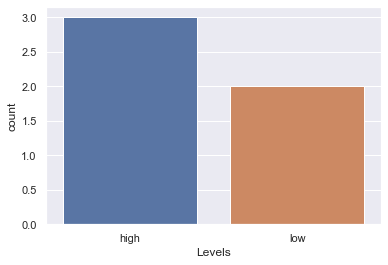

In [36]:
sns.set_theme(style="darkgrid")
sns.countplot(data=df_education, x="Levels", order=df_education.Levels.value_counts().index)

[Text(0, 0, '1015'),
 Text(0, 0, '439'),
 Text(0, 0, '335'),
 Text(0, 0, '183'),
 Text(0, 0, '49')]

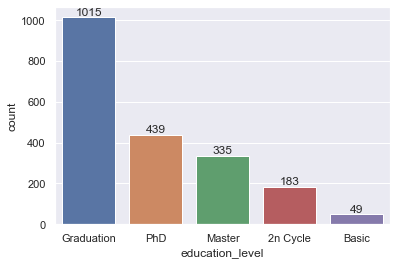

In [40]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="education_level", order=df.education_level.value_counts().index)
ax.bar_label(container=ax.containers[0])

#### Quantos clientes temos em cada estado civil?

In [174]:
df_status = pd.DataFrame({
  'Count' : df.marital_status.value_counts(),
  'Percent' : df.marital_status.value_counts() / len(df.marital_status) * 100
  }
).reset_index(drop=False)

df_status

,index,Count,Percent
0,Married,785,38.842157
1,Together,509,25.185552
2,Single,443,21.919842
3,Divorced,214,10.588817
4,Widow,70,3.463632


[Text(0, 0, '785'),
 Text(0, 0, '509'),
 Text(0, 0, '443'),
 Text(0, 0, '214'),
 Text(0, 0, '70')]

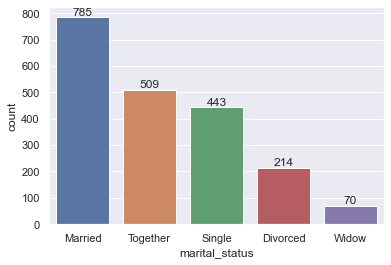

In [176]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="marital_status", order=df.marital_status.value_counts().index)
ax.bar_label(container=ax.containers[0])

## Correlacionamento dos dados:

- Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos? 
- As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?
- Pessoas que têm um maior salário gastam mais? 

#### Qual é a relação de estado civil com número de filhos? Será que as pessoas casadas têm um maior número de filhos?

In [130]:
marital_status_group = df.groupby('marital_status')['kids'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index(drop=False)
marital_status_group

,marital_status,count,mean,median,min,max
0,Divorced,214,1.023364,1,0,3
1,Married,785,0.977070,1,0,3
2,Single,443,0.860045,1,0,3
3,Together,509,0.982318,1,0,3
4,Widow,70,0.842857,1,0,2


Text(0, 0.5, 'Count of Children')

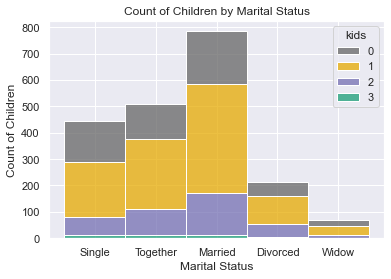

In [113]:
sns.set(style="darkgrid")
ax = sns.histplot(data=df, x='marital_status', hue='kids', multiple='stack', palette='Dark2_r')

ax.set_title('Count of Children by Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Count of Children')

sns.boxplot(x='marital_status', y='kids', data=df)

<AxesSubplot:xlabel='marital_status', ylabel='kids'>

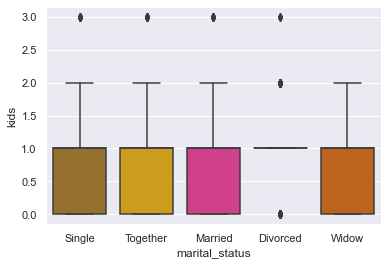

In [120]:
# Outra forma de analizar:
sns.set(style="darkgrid")
sns.boxplot(x='marital_status', y='kids', data=df, palette='Dark2_r')

#### As pessoas gastam mais ou menos em nossa plataforma quando têm filhos?

In [131]:
kids_vs_expenses = df.groupby('kids')['expenses'].agg(['count', 'mean', 'median', 'min', 'max']).reset_index(drop=False)
kids_vs_expenses

,kids,count,mean,median,min,max
0,0,567,1056.282187,1114,5,2491
1,1,1027,432.732230,265,4,2036
2,2,382,223.267016,84,8,1627
3,3,45,240.044444,62,6,1601


Text(0, 0.5, 'Count of Children')

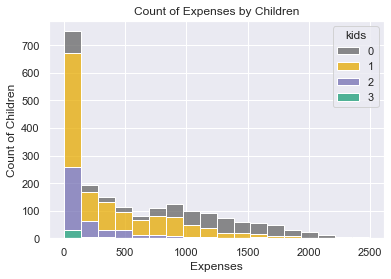

In [136]:
sns.set(style="darkgrid")
ax = sns.histplot(data=df, x='expenses', hue='kids', multiple='stack', palette='Dark2_r')

ax.set_title('Count of Expenses by Children')
ax.set_xlabel('Expenses')
ax.set_ylabel('Count of Children')

<AxesSubplot:xlabel='kids', ylabel='expenses'>

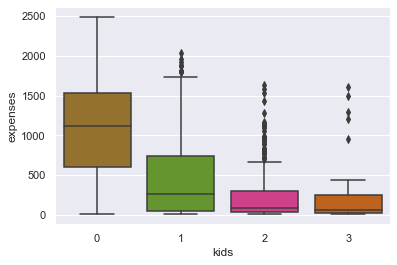

In [138]:
# Outra forma de analizar:
sns.set(style="darkgrid")
sns.boxplot(x='kids', y='expenses', data=df, palette='Dark2_r')

#### Pessoas que têm um maior salário gastam mais? 

In [143]:
df['Relação Gastos/Salário'] = df['expenses'] / df['Income']

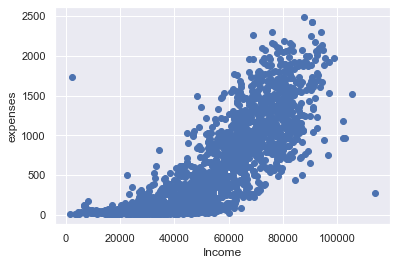

In [150]:
plt.scatter(df['Income'], df['expenses'])
plt.xlabel('Income')
plt.ylabel('expenses')
plt.show()

## Outras análises:

In [33]:
media = df.Income.mean()

# Calcula a moda
moda = df.Income.mode()[0]

# Calcula a mediana
mediana = df.Income.median()

# Imprime os resultados
print('Média: ', media)
print('Moda: ', moda)
print('Mediana: ', mediana)

Média:  51687.2587827808
Moda:  7500.0
Mediana:  51412.0
